# Gibbs Sampling Algorithm

Gibbs sampling} is used, when it is easier to sample from the conditional distribution of the components of $\mathbf{x}$ than from the distribution of $\mathbf{x}$ itself. Let $\mathbf{x}_n = (x_{n,1}, \ldots, x_{n,D})^T$, where $D$ is the dimension of the state space. The next element $\mathbf{x}_{n+1}$ is constructed in $D$ steps by drawing $x_{n+1,d}$ sequentially from the conditional probability $p(x | x_{n+1,1}, \ldots, x_{n+1,d-1}, x_{n,d+1}, \ldots, x_{n,D})$ for $d=1, \ldots, D$. This means, a component is used in the next draw as soon as it has been drawn.

the bivariate example
\begin{equation}
\boldsymbol{\mu} = \left( \begin{array}{c} \mu_1 \\ \mu_2 \end{array} \right), \hspace{1cm} \boldsymbol{\Sigma} = \left( \begin{array}{cc} \Sigma_{11} & \Sigma{12} \\ \Sigma{12} & \Sigma{22} \end{array} \right),
\end{equation}
the conditional probabilities are given by
\begin{equation}
\begin{array}{rcl}
p(x_1 | x_2) & = & \displaystyle \mathcal{N} \left( \mu_1 + \frac{\Sigma_{12}}{\Sigma_{22}} (x_2 - \mu_2), \Sigma_{11} - \frac{\Sigma_{12}^2}{\Sigma_{22}} \right), \\
p(x_2 | x_1) & = & \displaystyle \mathcal{N} \left( \mu_2 + \frac{\Sigma_{12}}{\Sigma_{11}} (x_1 - \mu_1), \Sigma_{22} - \frac{\Sigma_{12}^2}{\Sigma_{11}} \right).
\end{array}
\end{equation}

Explore the algorithm by changing the length of the chain and the start point.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
# Target mean:
target_mean = np.array([2, 3])
# Target variance:
target_var = np.array([[1, 1.5],[1.5, 3]])

# Eigenvalues and eigenvectors of variance to plot the confidence ellipse.
evalues, evectors = np.linalg.eig(target_var)
esort = np.argsort(evalues)

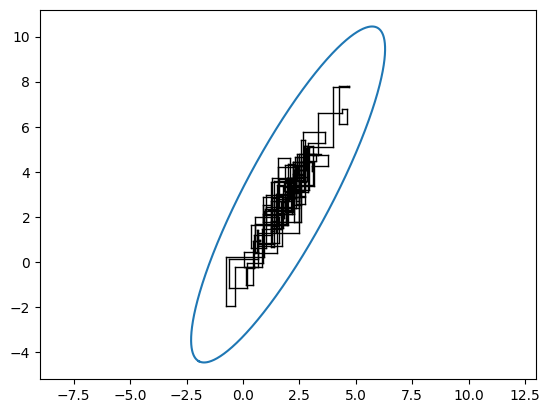

In [3]:
# Length of Markov chain
N = 300

samples = np.zeros((N,2))
samples[0,:] = target_mean
sigma0 =  np.sqrt(target_var[0,0] - target_var[0,1]**2 / target_var[1,1])
sigma1 =  np.sqrt(target_var[1,1] - target_var[0,1]**2 / target_var[0,0])
factor0 = target_var[0,1]/target_var[1,1]
factor1 = target_var[0,1]/target_var[0,0]

for total in range(1,N):
  # Depending whether we are at an even or odd step, update the first or
  # second component
  if total % 2:
    x = np.random.normal(target_mean[0] + factor0 *
     (samples[total-1,1]- target_mean[1]),
      sigma0)
    samples[total,0] = x
    samples[total,1] = samples[total-1,1]
  else:
    samples[total,0] = samples[total-1,0]
    y = np.random.normal(target_mean[1] + factor1 *
     (samples[total-1,0]- target_mean[0]),
      sigma1)
    samples[total,1] = y
  # Draw path of random walk.
  plt.plot([samples[total-1,0], samples[total,0]],
             [samples[total-1,1], samples[total,1]], 'k',
             linewidth =1)

# Specify confidence ( 0 <= p <= 1).
p = 0.99
chisquare_val = np.sqrt(scipy.stats.chi2.ppf(p,7))

theta = np.linspace(0, 2*np.pi, 1000);
ellipsis = chisquare_val * (np.sqrt(evalues[None,:]) *
                            evectors) @ [np.sin(theta), np.cos(theta)]
ellipsis = ellipsis + np.repeat(np.atleast_2d(target_mean).T,1000, axis = 1)
plt.plot(ellipsis[0,:], ellipsis[1,:])
plt.axis('equal')
plt.show()